<a href="https://colab.research.google.com/github/SaurabhSRP/Recommnedation-system-techniques/blob/main/Recommendation_system_4_(books)_rating_based_%2C_correlation_based_and_KNN_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
books = pd.read_csv('/content/drive/MyDrive/datasets/book recom/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
####
####
users = pd.read_csv('/content/drive/MyDrive/datasets/book recom/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
###
###
ratings = pd.read_csv('/content/drive/MyDrive/datasets/book recom/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

In [7]:
print(ratings.shape)
print(list(ratings.columns))
ratings.head()

(1149780, 3)
['userID', 'ISBN', 'bookRating']


,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


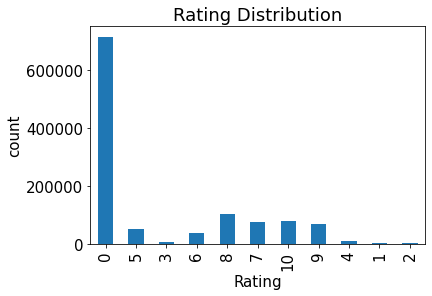

In [8]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("count")
plt.savefig('system1.png',bbox_inches='tight')
plt.show()

In [9]:
print(books.shape)
print(list(books.columns))
books.head()

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
print(users.shape)
print(list(users.columns))
users.head()

(278858, 3)
['userID', 'Location', 'Age']


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


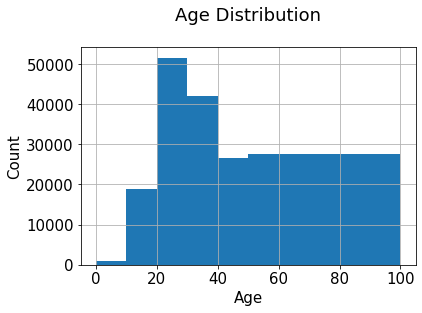

In [11]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

#**Recommendation Based on Ratings** 

In [12]:
rating_count=pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating',ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [13]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books,books,on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


#**Recommendation based on correlation**

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.

In [14]:
average_rating=pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [15]:
average_rating['ratingCount']=pd.DataFrame(ratings.groupby("ISBN")['bookRating'].count())
average_rating.sort_values('ratingCount',ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

**To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.**

In [16]:
counts1=ratings['userID'].value_counts()
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]

In [17]:
counts=ratings['bookRating'].value_counts()
ratings=ratings[ratings['bookRating'].isin(counts[counts>=100].index)]


In [18]:
ratings

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [19]:
ratings['userID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
225595      200
83671       200
252827      200
36554       200
99955       200
Name: userID, Length: 905, dtype: int64

###**Rating matrix**
We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.




In [20]:
ratings_pivot=ratings.pivot(index='userID',columns='ISBN').bookRating
userID=ratings_pivot.index
ISBN=ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
userID

Int64Index([   254,   2276,   2766,   2977,   3363,   3757,   4017,   4385,
              6242,   6251,
            ...
            274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478,
            277639, 278418],
           dtype='int64', name='userID', length=905)

In [22]:
ISBN

Index([' 0330299891', ' 0375404120', ' 0586045007', ' 9022906116',
       ' 9032803328', ' 9044922564', ' 9044922572', ' 9044922718',
       ' 9044923161', ' 904492401X',
       ...
       'UNGRANDHOMMED', 'X000000000', 'YOUTELLEM,AND', 'ZR903CX0003',
       '\0432534220\""', '\2842053052\""', 'b00005wz75', 'cn108465',
       'cn113107', 'Ô½crosoft'],
      dtype='object', name='ISBN', length=207699)

lets take a random book which starts with name -bones

In [23]:
bones_ratings=ratings_pivot['0316666343']
similar_to_bones=ratings_pivot.corrwith(bones_ratings)
corr_bones=pd.DataFrame(similar_to_bones,columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary=corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


we obtained the books ISBN , but we need to find out the titles of the book to see whether they make sense.

In [24]:
books_corr_to_bones=pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972'],index=np.arange(8),columns=['ISBN'])
corr_books=pd.merge(books_corr_to_bones,books,on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...


##**Collaborative Filtering Using k-Nearest Neighbors (kNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [25]:
combine_book_rating=pd.merge(ratings,books,on='ISBN')
columns=['yearOfPublication','publisher','bookAuthor','imageUrlS','imageUrlM','imageUrlL']
combine_book_rating=combine_book_rating.drop(columns,axis=1)
combine_book_rating.head()


,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


We then group by book titles and create a new column for total rating count

In [26]:
combine_book_rating=combine_book_rating.dropna(axis=0,subset=['bookTitle'])

In [27]:
book_ratingCount = (combine_book_rating.groupby(by = ['bookTitle'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})
    )
book_ratingCount

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160571,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160572,Ã?Â?lpiraten.,1
160573,Ã?Â?rger mit Produkt X. Roman.,1
160574,Ã?Â?stlich der Berge.,1


We combine the rating data with the total rating count data , this gives us exactly what we need to find out which books are popular and filter out the lesser known books

In [28]:
rating_with_totalRatingCount=combine_book_rating.merge(book_ratingCount,left_on='bookTitle',right_on='bookTitle',how='left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [29]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


the median book has been rated only once . lets look at the top of the distribution

In [30]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


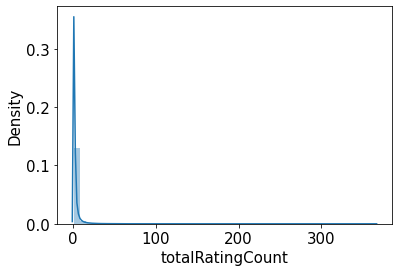

In [31]:
import seaborn as sns
sns.distplot(book_ratingCount['totalRatingCount'],kde=True)

In [32]:
popularity_threshold = 50 
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()


,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [33]:
rating_popular_book.shape

(62149, 5)

As the shape is of 62149 values , its too book for running this algorithm so lets just take users from US and Cannada only

###**Filter to users in US and Canada only**

In [37]:
combined=rating_popular_book.merge(users,left_on='userID',right_on='userID',how='left')

us_canada_user_rating=combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


##**Implementing kNN**
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

 

In [38]:
from scipy.sparse import csr_matrix
us_canada_user_rating=us_canada_user_rating.drop_duplicates(['userID','bookTitle'])
us_canada_user_rating_pivot=us_canada_user_rating.pivot(index='bookTitle',columns='userID',values='bookRating').fillna(0)


In [39]:
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
84 Charing Cross Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000


In [47]:
us_canada_user_rating_matrix=csr_matrix(us_canada_user_rating_pivot.values)
print(us_canada_user_rating_matrix)

  (0, 0)	9.0
  (0, 15)	8.0
  (0, 34)	9.0
  (0, 37)	8.0
  (0, 51)	7.0
  (0, 115)	9.0
  (0, 131)	10.0
  (0, 142)	9.0
  (0, 157)	8.0
  (0, 181)	10.0
  (0, 201)	10.0
  (0, 224)	10.0
  (0, 302)	9.0
  (0, 319)	10.0
  (0, 399)	7.0
  (0, 450)	10.0
  (0, 491)	9.0
  (0, 498)	8.0
  (0, 571)	9.0
  (0, 628)	8.0
  (0, 633)	7.0
  (0, 684)	10.0
  (0, 725)	10.0
  (1, 10)	9.0
  (1, 37)	9.0
  :	:
  (744, 123)	5.0
  (744, 147)	9.0
  (744, 249)	8.0
  (744, 329)	2.0
  (744, 393)	8.0
  (745, 15)	8.0
  (745, 73)	10.0
  (745, 95)	5.0
  (745, 128)	6.0
  (745, 191)	7.0
  (745, 236)	8.0
  (745, 249)	9.0
  (745, 299)	10.0
  (745, 314)	9.0
  (745, 362)	7.0
  (745, 366)	9.0
  (745, 394)	7.0
  (745, 403)	10.0
  (745, 408)	8.0
  (745, 442)	10.0
  (745, 480)	8.0
  (745, 575)	10.0
  (745, 587)	8.0
  (745, 615)	10.0
  (745, 687)	9.0


In [45]:
from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [49]:
query_index=np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)

430


In [51]:
distances,indices=model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [52]:
us_canada_user_rating_pivot.index[query_index]

'Saint Maybe'

In [54]:
for i in range (0,len(distances.flatten())):
  if i==0:
    print("Recommendations for {0}:/n".format(us_canada_user_rating_pivot.index[query_index]))
  else:
    print('{0}:{1}, with distance of {2}:'.format(i,us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Saint Maybe:/n
1:Ladder of Years, with distance of 0.717983875886747:
2:Here on Earth, with distance of 0.7288045287591517:
3:How to Be Good, with distance of 0.754071484388537:
4:Song of Solomon (Oprah's Book Club (Paperback)), with distance of 0.7715696929060503:
5:The Honk and Holler Opening Soon, with distance of 0.777933761811433:
